epoch     0 | MSE: 1768.000000
Early stopping at epoch 247 | final MSE: 0.000014
Final weights: [25.99459 25.81989  6.67038]

Predictions for x = 10, 11, 12:
  x = 10 → y ≈ 101.01
  x = 11 → y ≈ 122.01
  x = 12 → y ≈ 145.02


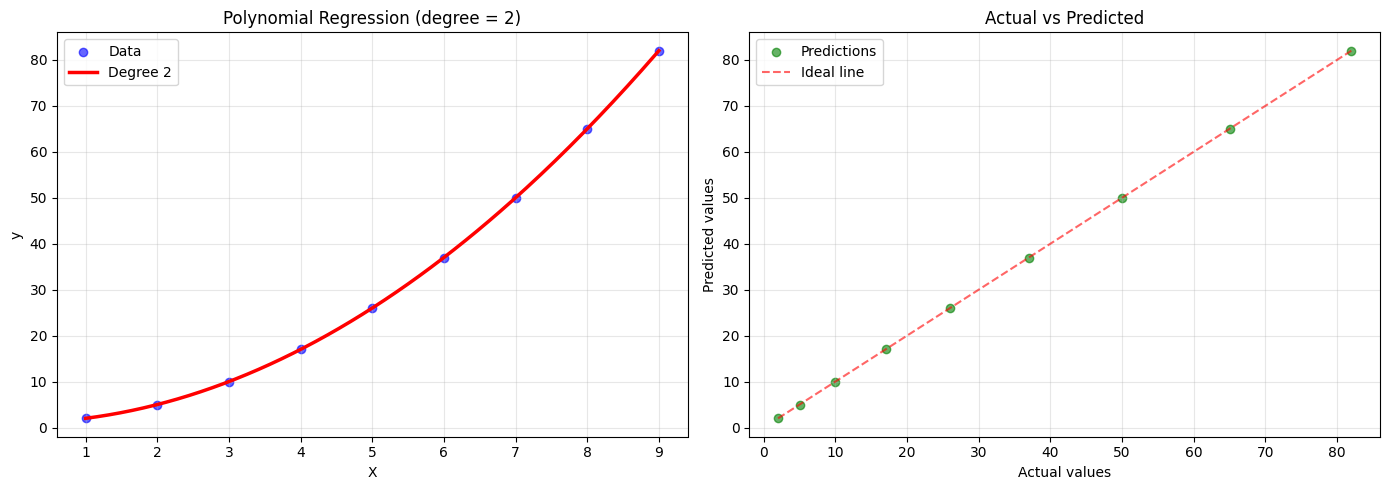

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class PolynomialRegression:
    def __init__(self, degree=2, lr=0.01, epochs=15000, tol=1e-6):
        self.degree = degree
        self.lr = lr
        self.epochs = epochs
        self.tol = tol
        self.w = None
        self.X_mean = None
        self.X_std = None

    def _preprocess(self, X):
        X = np.asarray(X).ravel()
        if self.X_mean is None:
            self.X_mean = X.mean()
            self.X_std = X.std() + 1e-8
        return (X - self.X_mean) / self.X_std

    def fit(self, X, y):
        X_scaled = self._preprocess(X)
        y = np.asarray(y).ravel()

        n = len(X_scaled)
        phi = np.column_stack([X_scaled**i for i in range(self.degree + 1)])

        self.w = np.zeros(self.degree + 1)
        prev_loss = float('inf')

        for epoch in range(self.epochs):
            y_pred = phi @ self.w
            error = y_pred - y
            grad = (2 / n) * (phi.T @ error)
            self.w -= self.lr * grad

            loss = np.mean(error ** 2)

            if epoch % 2000 == 0:
                print(f"epoch {epoch:5d} | MSE: {loss:.6f}")

            if abs(prev_loss - loss) < self.tol:
                print(f"Early stopping at epoch {epoch} | final MSE: {loss:.6f}")
                break

            prev_loss = loss

        print(f"Final weights: {np.round(self.w, 5)}")
        return self

    def predict(self, X):
        if self.w is None:
            raise ValueError("Model not fitted yet. Call fit() first.")
        X_scaled = self._preprocess(X)
        phi = np.column_stack([X_scaled**i for i in range(self.degree + 1)])
        return phi @ self.w

    def plot(self, X, y):
        plt.figure(figsize=(14, 5))

        # left plot: data + fit curve
        plt.subplot(1, 2, 1)
        plt.scatter(X, y, color='blue', alpha=0.6, label='Data')

        X_line = np.linspace(min(X), max(X), 200)
        y_line = self.predict(X_line)
        plt.plot(X_line, y_line, color='red', linewidth=2.5, label=f'Degree {self.degree}')

        plt.xlabel('X')
        plt.ylabel('y')
        plt.title(f'Polynomial Regression (degree = {self.degree})')
        plt.legend()
        plt.grid(True, alpha=0.3)

        # right plot: actual vs predicted
        plt.subplot(1, 2, 2)
        y_pred = self.predict(X)
        plt.scatter(y, y_pred, color='green', alpha=0.6, label='Predictions')
        plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=1.5, alpha=0.6, label='Ideal line')

        plt.xlabel('Actual values')
        plt.ylabel('Predicted values')
        plt.title('Actual vs Predicted')
        plt.legend()
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()


# ──────────────── example ────────────────
if __name__ == "__main__":
    X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=float)
    y = np.array([2, 5, 10, 17, 26, 37, 50, 65, 82], dtype=float)

    model = PolynomialRegression(degree=2, lr=0.05, epochs=12000)
    model.fit(X, y)

    X_test = np.array([10, 11, 12])
    preds = model.predict(X_test)
    print("\nPredictions for x = 10, 11, 12:")
    for x, p in zip(X_test, preds):
        print(f"  x = {x:2.0f} → y ≈ {p:.2f}")

    model.plot(X, y)

X shape: (15,)
y (with noise): [-40.45 -27.67 -16.93  -8.79  -4.78  -1.44   1.64   1.74   0.76   0.97
  -0.25  -0.41   0.67   0.86   4.19]

Degree 2
epoch     0 | MSE: 187.814611
Early stopping at epoch 90
Final weights: [ 1.5183  9.6096 -7.5146]


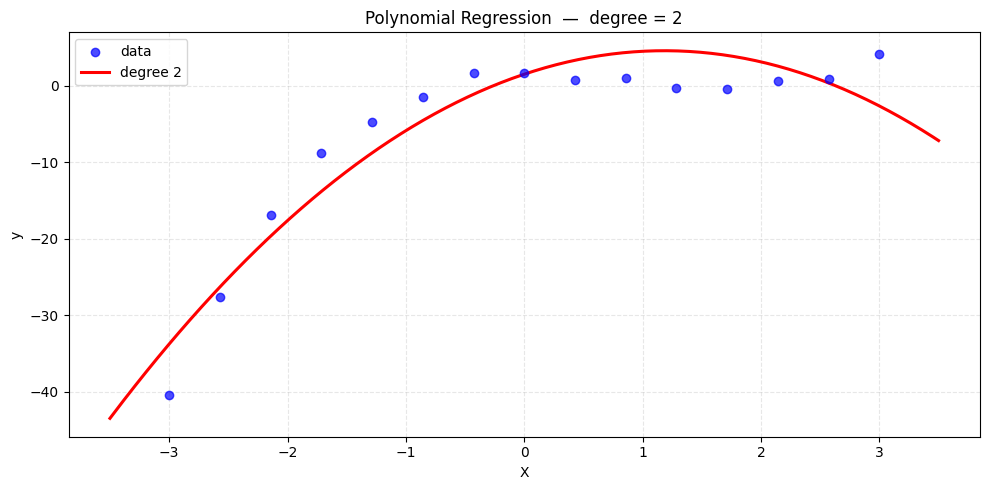

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class PolynomialRegression:
    def __init__(self, degree=2, lr=0.01, epochs=12000, tol=1e-5):
        self.degree = degree
        self.lr = lr
        self.epochs = epochs
        self.tol = tol
        self.w = None
        self.X_mean = None
        self.X_std = None

    def _preprocess(self, X):
        X = np.asarray(X).ravel()
        if self.X_mean is None:
            self.X_mean = X.mean()
            self.X_std = X.std() + 1e-8
        return (X - self.X_mean) / self.X_std

    def fit(self, X, y):
        X_scaled = self._preprocess(X)
        y = np.asarray(y).ravel()

        n = len(X_scaled)
        phi = np.column_stack([X_scaled**i for i in range(self.degree + 1)])

        self.w = np.zeros(self.degree + 1)
        prev_loss = float('inf')

        for epoch in range(self.epochs):
            y_pred = phi @ self.w
            error = y_pred - y
            grad = (2 / n) * phi.T @ error
            self.w -= self.lr * grad

            loss = np.mean(error ** 2)

            if epoch % 4000 == 0:
                print(f"epoch {epoch:5d} | MSE: {loss:.6f}")

            if abs(prev_loss - loss) < self.tol:
                print(f"Early stopping at epoch {epoch}")
                break
            prev_loss = loss

        print(f"Final weights: {self.w.round(4)}")
        return self

    def predict(self, X):
        if self.w is None:
            raise ValueError("Model not fitted yet.")
        X_scaled = self._preprocess(X)
        phi = np.column_stack([X_scaled**i for i in range(self.degree + 1)])
        return phi @ self.w

    def plot(self, X, y):
        plt.figure(figsize=(10, 5))

        plt.scatter(X, y, color='blue', alpha=0.7, label='data', zorder=3)

        X_plot = np.linspace(min(X)-0.5, max(X)+0.5, 300)
        y_plot = self.predict(X_plot)

        plt.plot(X_plot, y_plot, color='red', lw=2.2, label=f'degree {self.degree}')

        plt.xlabel('X')
        plt.ylabel('y')
        plt.title(f'Polynomial Regression  —  degree = {self.degree}')
        plt.legend()
        plt.grid(True, alpha=0.3, linestyle='--')
        plt.tight_layout()
        plt.show()


if __name__ == "__main__":
    np.random.seed(42)

    X = np.linspace(-3, 3, 15)
    true_fun = lambda x: 0.8 * x**3 - 2.1 * x**2 + 0.5 * x + 1.2
    y_true = true_fun(X)
    y = y_true + np.random.normal(0, 0.7, size=X.shape)

    print("X shape:", X.shape)
    print("y (with noise):", np.round(y, 2))

    print("\nDegree 2")
    model = PolynomialRegression(degree=2, lr=0.1, epochs=15000)
    model.fit(X, y)
    model.plot(X, y)